# Team Project 1  
**Authors:** Aaron Bone and Molly Rovinski  
**Version:** 1.0  
**Semester:** Spring 2021  

**Goal:** Apply the exploratory analysis techniques you have learned this semester to prepare a dataset and implement a machine learning (ML) model. 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **Part 1: Exploratory Data Analysis**

## **A. Data Description**

**Read in Chess data file.**

In [9]:
p = pd.read_csv('ChessGames.csv')

In [10]:
p.head(5)

,GAME,BlackElo,BlackRatingDiff,Date,ECO,Event,Opening,White_Result,Black_Result,Result,...,Black_ts_blunders,White_ts_blunders,Black_ts_mistakes,White_ts_mistake,Black_long_moves,White_long_moves,Black_bad_long_moves,White_bad_long_moves,Game_flips,Game_flips_ts
0,11,1143,6.0,2020.09.01,A02,Rated Blitz game,Bird Opening,0.0,1.0,0-1,...,0,0,0,0,2,1,1,1,8,0
1,14,1504,NaN,2020.09.01,A04,Rated Blitz game,R√©ti Opening,0.0,1.0,0-1,...,0,0,0,0,0,1,0,0,6,0
2,29,1933,1.0,2020.09.01,C41,Rated Blitz game,Philidor Defense,0.0,1.0,0-1,...,0,0,0,0,1,1,1,0,5,0
3,40,1710,10.0,2020.09.01,B23,Rated Blitz game,Sicilian Defense: Closed,0.0,1.0,0-1,...,4,0,0,0,3,1,1,0,8,1
4,55,1598,-1.0,2020.09.01,B03,Rated Rapid game,Alekhine Defense,1.0,0.0,Jan-00,...,0,0,0,0,0,0,0,0,2,0


**Drop columns that do not correlate with each other due to specificity of each game.**

In [11]:
Chess = p.drop(columns = ['Result', 'Site', 'Event', 'Opening'])

In [12]:
Chess.columns

Index(['GAME', 'BlackElo', 'BlackRatingDiff', 'Date', 'ECO', 'White_Result',
       'Black_Result', 'Termination', 'TimeControl', 'UTCTime', 'WhiteElo',
       'WhiteRatingDiff', 'Black_elo_category', 'White_elo_category',
       'starting_time', 'increment', 'Game_type', 'Total_moves',
       'Black_blunders', 'White_blunders', 'Black_mistakes', 'White_mistakes',
       'Black_inaccuracies', 'White_inaccuracies', 'Black_inferior_moves',
       'White_inferior_moves', 'Black_ts_moves', 'White_ts_moves',
       'Black_ts_blunders', 'White_ts_blunders', 'Black_ts_mistakes',
       'White_ts_mistake', 'Black_long_moves', 'White_long_moves',
       'Black_bad_long_moves', 'White_bad_long_moves', 'Game_flips',
       'Game_flips_ts'],
      dtype='object')

**Gather date type for each variable.**

In [13]:
Chess.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GAME                  4998 non-null   int64  
 1   BlackElo              4998 non-null   int64  
 2   BlackRatingDiff       4983 non-null   float64
 3   Date                  4998 non-null   object 
 4   ECO                   4998 non-null   object 
 5   White_Result          4998 non-null   float64
 6   Black_Result          4998 non-null   float64
 7   Termination           4998 non-null   object 
 8   TimeControl           4998 non-null   object 
 9   UTCTime               4998 non-null   object 
 10  WhiteElo              4998 non-null   int64  
 11  WhiteRatingDiff       4983 non-null   float64
 12  Black_elo_category    4998 non-null   object 
 13  White_elo_category    4998 non-null   object 
 14  starting_time         4983 non-null   float64
 15  increment            

**Change datatype for White_Result and Black_Result to int for future purposes.**

In [14]:
cols = ['White_Result', 'Black_Result']
for col in cols:
   Chess[col] = Chess[col].apply(lambda x: int(x) if x == x else "")

In [15]:
Chess.sample(50)

,GAME,BlackElo,BlackRatingDiff,Date,ECO,White_Result,Black_Result,Termination,TimeControl,UTCTime,...,Black_ts_blunders,White_ts_blunders,Black_ts_mistakes,White_ts_mistake,Black_long_moves,White_long_moves,Black_bad_long_moves,White_bad_long_moves,Game_flips,Game_flips_ts
1536,26992,1907,1.0,2020.09.01,A43,0,1,Time forfeit,60+0,0:22:31,...,0,1,0,1,0,0,0,0,16,0
3095,53332,2079,10.0,2020.09.01,C77,0,1,Time forfeit,600+0,0:46:05,...,1,1,0,0,0,0,0,0,23,2
3970,68392,1873,6.0,2020.09.01,C00,0,1,Normal,60+0,1:00:18,...,0,0,0,0,0,1,0,0,13,0
2964,51156,1176,-5.0,2020.09.01,A01,1,0,Time forfeit,60+0,0:44:08,...,0,0,0,0,1,1,0,0,5,0
4806,82246,1568,5.0,2020.09.01,C41,0,1,Normal,900+10,1:13:33,...,0,1,0,1,0,1,0,1,5,0
495,8349,1142,14.0,2020.09.01,A00,0,1,Time forfeit,60+0,0:06:39,...,0,0,0,0,2,2,0,1,5,0
206,3314,1272,44.0,2020.09.01,B01,0,1,Normal,600+0,0:02:20,...,0,0,0,0,1,0,0,0,10,0
1725,30171,1519,-3.0,2020.09.01,A40,1,0,Normal,240+2,0:25:08,...,0,0,0,0,0,0,0,0,7,0
3922,67644,2004,-6.0,2020.09.01,B18,1,0,Normal,300+3,0:59:37,...,0,0,0,0,1,1,0,1,4,0
2416,42050,1565,-6.0,2020.09.01,E54,1,0,Normal,300+3,0:35:51,...,0,0,0,0,0,0,0,0,3,0


In [16]:
pd.set_option('display.max_columns', None)

In [17]:
pd.set_option('display.max_rows', None)

In [18]:
Chess.dtypes

GAME                      int64
BlackElo                  int64
BlackRatingDiff         float64
Date                     object
ECO                      object
White_Result              int64
Black_Result              int64
Termination              object
TimeControl              object
UTCTime                  object
WhiteElo                  int64
WhiteRatingDiff         float64
Black_elo_category       object
White_elo_category       object
starting_time           float64
increment               float64
Game_type                object
Total_moves               int64
Black_blunders            int64
White_blunders            int64
Black_mistakes            int64
White_mistakes            int64
Black_inaccuracies        int64
White_inaccuracies        int64
Black_inferior_moves      int64
White_inferior_moves      int64
Black_ts_moves            int64
White_ts_moves            int64
Black_ts_blunders         int64
White_ts_blunders         int64
Black_ts_mistakes         int64
White_ts

**Find missing data for each variable.**

In [19]:
Chess.isna().mean().round(10)*100

GAME                    0.00000
BlackElo                0.00000
BlackRatingDiff         0.30012
Date                    0.00000
ECO                     0.00000
White_Result            0.00000
Black_Result            0.00000
Termination             0.00000
TimeControl             0.00000
UTCTime                 0.00000
WhiteElo                0.00000
WhiteRatingDiff         0.30012
Black_elo_category      0.00000
White_elo_category      0.00000
starting_time           0.30012
increment               0.30012
Game_type               0.00000
Total_moves             0.00000
Black_blunders          0.00000
White_blunders          0.00000
Black_mistakes          0.00000
White_mistakes          0.00000
Black_inaccuracies      0.00000
White_inaccuracies      0.00000
Black_inferior_moves    0.00000
White_inferior_moves    0.00000
Black_ts_moves          0.00000
White_ts_moves          0.00000
Black_ts_blunders       0.00000
White_ts_blunders       0.00000
Black_ts_mistakes       0.00000
White_ts

**Get data summary for Chess dataset.**

In [20]:
Chess.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
GAME,4998.0,43158.77,24818.99,11.0,21755.5,43279.0,65005.5,85715.0
BlackElo,4998.0,1606.56,341.71,600.0,1355.0,1595.5,1847.0,2999.0
BlackRatingDiff,4983.0,3.63,31.49,-431.0,-6.0,-1.0,6.0,359.0
White_Result,4998.0,0.50,0.50,0.0,0.0,1.0,1.0,1.0
Black_Result,4998.0,0.47,0.50,0.0,0.0,0.0,1.0,1.0
WhiteElo,4998.0,1605.08,342.96,639.0,1357.0,1588.0,1843.0,3006.0
WhiteRatingDiff,4983.0,4.16,31.49,-336.0,-6.0,1.0,7.0,656.0
starting_time,4983.0,375.93,338.00,0.0,180.0,300.0,600.0,5400.0
increment,4983.0,1.84,4.49,0.0,0.0,0.0,3.0,180.0
Total_moves,4998.0,64.51,27.15,6.0,46.0,60.0,77.0,269.0


## **B. Categorical Variable Frequency**

In [21]:
Chess.White_Result.value_counts()

1    2522
0    2476
Name: White_Result, dtype: int64

In [22]:
Chess.White_Result.value_counts()/len(Chess)

1    0.504602
0    0.495398
Name: White_Result, dtype: float64

In [23]:
Chess.Black_Result.value_counts()

0    2666
1    2332
Name: Black_Result, dtype: int64

In [24]:
Chess.Black_Result.value_counts()/len(Chess)

0    0.533413
1    0.466587
Name: Black_Result, dtype: float64

In [25]:
Chess.Termination.value_counts()

Normal          3914
Time forfeit    1084
Name: Termination, dtype: int64

In [26]:
Chess.Termination.value_counts()/len(Chess)

Normal          0.783113
Time forfeit    0.216887
Name: Termination, dtype: float64

In [27]:
Chess.Black_elo_category.value_counts()

Low rating     3987
High rating     960
GM rating        51
Name: Black_elo_category, dtype: int64

In [28]:
Chess.Black_elo_category.value_counts()/len(Chess)

Low rating     0.797719
High rating    0.192077
GM rating      0.010204
Name: Black_elo_category, dtype: float64

In [29]:
Chess.White_elo_category.value_counts()

Low rating     3972
High rating     978
GM rating        48
Name: White_elo_category, dtype: int64

In [30]:
Chess.White_elo_category.value_counts()/len(Chess)

Low rating     0.794718
High rating    0.195678
GM rating      0.009604
Name: White_elo_category, dtype: float64

In [31]:
Chess.Game_type.value_counts()

Blitz             2242
Rapid             1556
Bullet            1039
Classical          146
Correspondence      15
Name: Game_type, dtype: int64

In [32]:
Chess.Game_type.value_counts()/len(Chess)

Blitz             0.448579
Rapid             0.311325
Bullet            0.207883
Classical         0.029212
Correspondence    0.003001
Name: Game_type, dtype: float64

In [33]:
Chess.ECO.value_counts()

D00    235
A00    231
A40    188
C00    165
B01    164
B00    136
C50    129
C20    112
D02    110
C42    109
B20    108
A45    107
C41     92
C44     87
C46     76
B10     76
C40     71
B21     71
B07     69
B06     66
C45     65
C55     65
B30     64
A04     63
A01     58
B50     56
B12     54
D06     51
C02     46
D30     46
B32     45
A43     43
B40     41
C01     41
A41     41
A06     40
D20     39
B23     39
C62     37
B02     36
C23     36
A10     35
C53     32
B22     29
B13     26
C25     26
A03     25
C30     25
B90     23
B33     23
D10     23
D31     23
A20     22
C47     22
B08     21
D01     21
C57     20
D35     20
C34     20
A02     19
C26     19
A46     19
A13     19
C48     18
A21     17
C21     17
C64     17
A50     17
C24     17
B54     16
A80     15
C60     15
C65     15
E61     15
A22     14
B15     14
B27     14
C22     14
A48     13
B52     12
C70     12
D05     12
D07     11
B18     11
D04     11
A25     11
B25     11
C51     11
C43     10
C11     10
C03     10

In [34]:
Chess.ECO.value_counts()/len(Chess)

D00    0.047019
A00    0.046218
A40    0.037615
C00    0.033013
B01    0.032813
B00    0.027211
C50    0.025810
C20    0.022409
D02    0.022009
C42    0.021809
B20    0.021609
A45    0.021409
C41    0.018407
C44    0.017407
C46    0.015206
B10    0.015206
C40    0.014206
B21    0.014206
B07    0.013806
B06    0.013205
C45    0.013005
C55    0.013005
B30    0.012805
A04    0.012605
A01    0.011605
B50    0.011204
B12    0.010804
D06    0.010204
C02    0.009204
D30    0.009204
B32    0.009004
A43    0.008603
B40    0.008203
C01    0.008203
A41    0.008203
A06    0.008003
D20    0.007803
B23    0.007803
C62    0.007403
B02    0.007203
C23    0.007203
A10    0.007003
C53    0.006403
B22    0.005802
B13    0.005202
C25    0.005202
A03    0.005002
C30    0.005002
B90    0.004602
B33    0.004602
D10    0.004602
D31    0.004602
A20    0.004402
C47    0.004402
B08    0.004202
D01    0.004202
C57    0.004002
D35    0.004002
C34    0.004002
A02    0.003802
C26    0.003802
A46    0.003802
A13    0

## **C. Correlation**

**Create correlation matrix and heatmap.**

In [35]:
Chess.corr()

,GAME,BlackElo,BlackRatingDiff,White_Result,Black_Result,WhiteElo,WhiteRatingDiff,starting_time,increment,Total_moves,Black_blunders,White_blunders,Black_mistakes,White_mistakes,Black_inaccuracies,White_inaccuracies,Black_inferior_moves,White_inferior_moves,Black_ts_moves,White_ts_moves,Black_ts_blunders,White_ts_blunders,Black_ts_mistakes,White_ts_mistake,Black_long_moves,White_long_moves,Black_bad_long_moves,White_bad_long_moves,Game_flips,Game_flips_ts
GAME,1.000000,0.020518,-0.001096,-0.003419,0.002247,0.012238,-0.002098,0.014712,-0.006621,0.005574,-0.021477,-0.014215,0.004919,0.009404,-0.005141,-0.016033,-0.009351,-0.008689,0.013757,-0.000023,0.021292,0.002419,0.005364,-0.017430,0.021294,-0.001325,0.004538,0.000628,-0.008605,0.013427
BlackElo,0.020518,1.000000,-0.035362,-0.038496,0.019458,0.895718,-0.005019,-0.012614,-0.008189,0.195804,-0.190198,-0.166895,0.005855,0.025935,0.079763,0.077663,-0.043341,-0.023467,0.085219,0.092609,0.024434,0.034808,0.056847,0.056652,0.059080,0.089285,0.026697,0.051635,-0.058134,0.044965
BlackRatingDiff,-0.001096,-0.035362,1.000000,-0.443569,0.451508,0.005797,-0.303642,0.030294,0.047349,-0.011342,-0.094408,0.116913,-0.045774,0.072106,-0.070895,0.066865,-0.100215,0.119968,-0.057875,0.029595,-0.063028,0.037694,-0.044839,0.036565,-0.057691,0.041050,-0.049470,0.057497,0.021930,-0.010663
White_Result,-0.003419,-0.038496,-0.443569,1.000000,-0.943912,0.041234,0.429623,-0.009665,-0.025342,-0.068968,0.216135,-0.260466,0.087914,-0.156543,0.122781,-0.152997,0.201438,-0.266900,0.033812,-0.114774,0.115333,-0.133403,0.059893,-0.090530,0.124234,-0.119785,0.113672,-0.136883,-0.051197,-0.031196
Black_Result,0.002247,0.019458,0.451508,-0.943912,1.000000,-0.061795,-0.422699,0.003596,0.018662,-0.025032,-0.240536,0.240148,-0.118574,0.122061,-0.147623,0.129958,-0.240498,0.229247,-0.091609,0.060361,-0.134673,0.119544,-0.084287,0.066768,-0.125043,0.113659,-0.115323,0.137858,0.014488,-0.004374
WhiteElo,0.012238,0.895718,0.005797,0.041234,-0.061795,1.000000,-0.043535,-0.010035,-0.020384,0.182147,-0.169112,-0.198443,0.017722,0.000831,0.088435,0.041845,-0.023504,-0.067014,0.089679,0.089714,0.032383,0.025698,0.064864,0.059919,0.066579,0.068490,0.035651,0.033666,-0.067789,0.043900
WhiteRatingDiff,-0.002098,-0.005019,-0.303642,0.429623,-0.422699,-0.043535,1.000000,0.032192,-0.023635,-0.017559,0.120705,-0.083286,0.037536,-0.043815,0.053092,-0.063180,0.099016,-0.088684,0.009108,-0.061035,0.046496,-0.057458,0.015519,-0.033172,0.057369,-0.067007,0.041448,-0.062336,0.003670,-0.014431
starting_time,0.014712,-0.012614,0.030294,-0.009665,0.003596,-0.010035,0.032192,1.000000,0.280547,0.030538,-0.022120,-0.021255,0.003024,0.003617,-0.028430,-0.018394,-0.021738,-0.015917,-0.074757,-0.091406,-0.082107,-0.091545,-0.039243,-0.062624,-0.165186,-0.166574,-0.126291,-0.134988,-0.023258,-0.082577
increment,-0.006621,-0.008189,0.047349,-0.025342,0.018662,-0.020384,-0.023635,0.280547,1.000000,0.004886,-0.021587,-0.012000,-0.028236,-0.020511,-0.021658,-0.004389,-0.035021,-0.018049,-0.018861,-0.017211,-0.014187,-0.018420,-0.000301,0.001639,0.049851,0.044312,0.027536,0.016999,-0.016214,-0.013113
Total_moves,0.005574,0.195804,-0.011342,-0.068968,-0.025032,0.182147,-0.017559,0.030538,0.004886,1.000000,0.265569,0.294210,0.392789,0.407242,0.412519,0.421855,0.524397,0.537667,0.487010,0.460571,0.222107,0.227803,0.219402,0.208484,0.072481,0.073390,0.043253,0.040200,0.373305,0.282988


In [36]:
Correlation_Tab = Chess.corr()

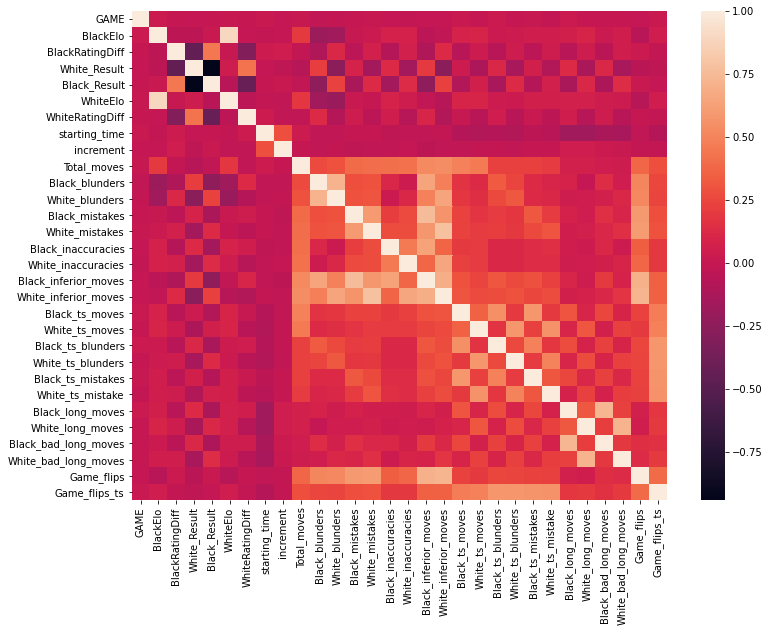

In [37]:
plt.figure(figsize = (12,9))
sns.heatmap(Correlation_Tab)
plt.savefig('CorrelationTable')

## **D. Graphical Description**

**Create distribution plots for each variable.**

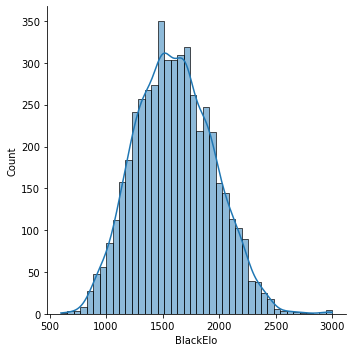

In [38]:
sns.displot(Chess.BlackElo, kde = True)
plt.savefig('BlackElo')

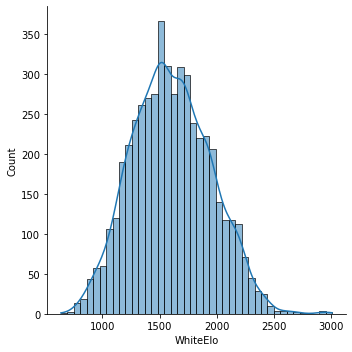

In [39]:
sns.displot(Chess.WhiteElo, kde = True)
plt.savefig('WhiteElo')

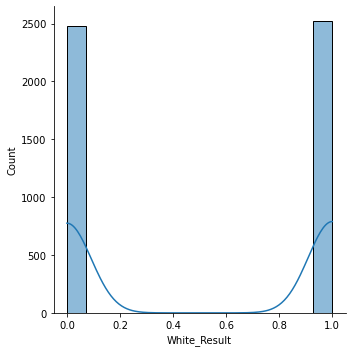

In [40]:
sns.displot(Chess.White_Result, kde = True)
plt.savefig('White_Result')

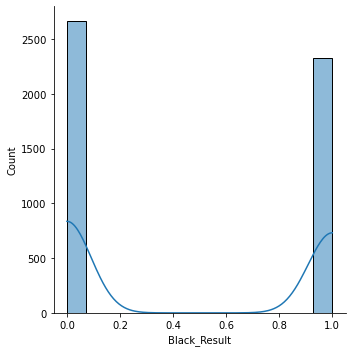

In [41]:
sns.displot(Chess.Black_Result , kde = True)
plt.savefig('Black_Result')

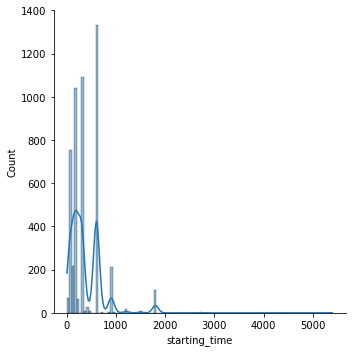

In [42]:
sns.displot(Chess.starting_time, kde = True)
plt.savefig('starting_time')

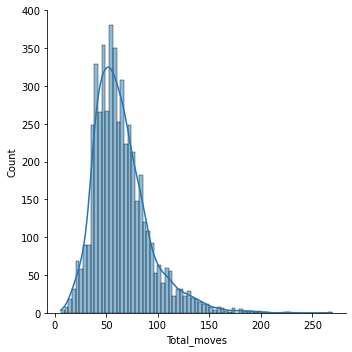

In [43]:
sns.displot(Chess.Total_moves, kde = True)
plt.savefig('Total_moves')

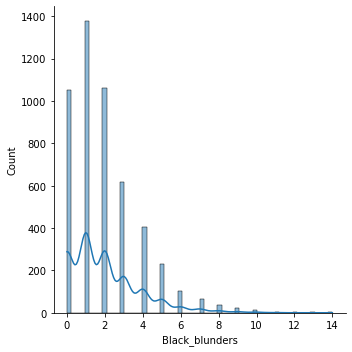

In [44]:
sns.displot(Chess.Black_blunders, kde = True)
plt.savefig('Black_blunders')

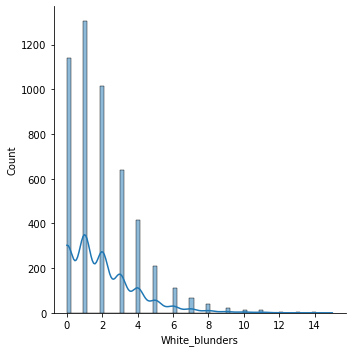

In [45]:
sns.displot(Chess.White_blunders, kde = True)
plt.savefig('White_blunders')

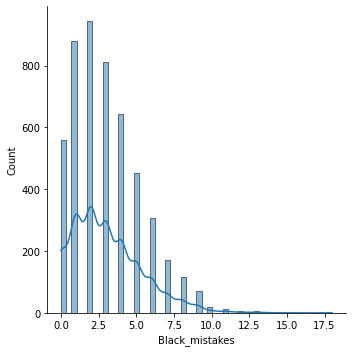

In [46]:
sns.displot(Chess.Black_mistakes, kde = True)
plt.savefig('Black_mistakes')

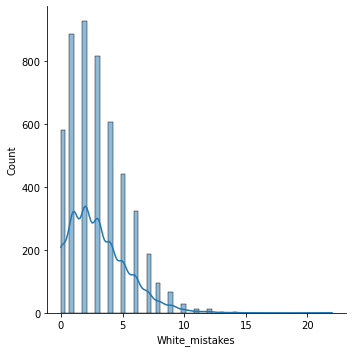

In [47]:
sns.displot(Chess.White_mistakes, kde = True)
plt.savefig('White_mistakes')

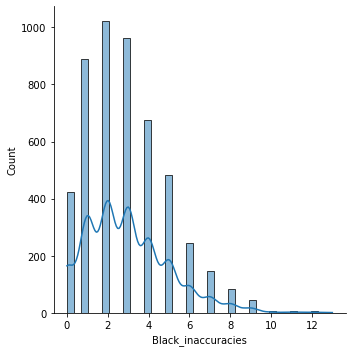

In [48]:
sns.displot(Chess.Black_inaccuracies, kde = True)
plt.savefig('Black_inaccuracies')

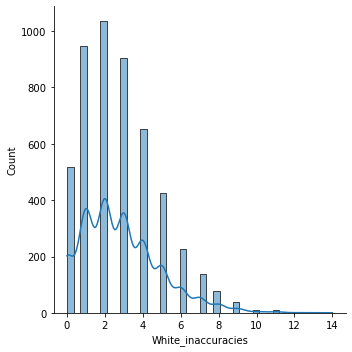

In [49]:
sns.displot(Chess.White_inaccuracies, kde = True)
plt.savefig('White_inaccuracies')

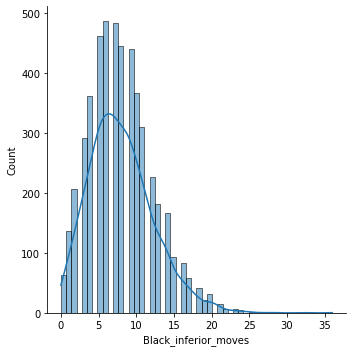

In [50]:
sns.displot(Chess.Black_inferior_moves, kde = True)
plt.savefig('Black_inferior_moves')

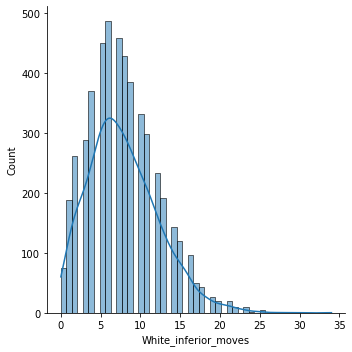

In [51]:
sns.displot(Chess.White_inferior_moves, kde = True)
plt.savefig('White_inferior_moves')

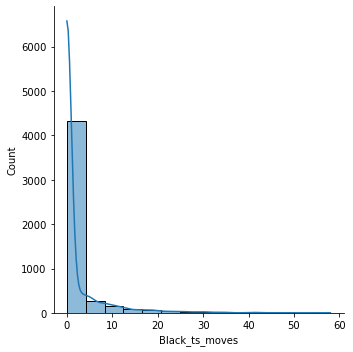

In [52]:
sns.displot(Chess.Black_ts_moves, kde = True)
plt.savefig('Black_ts_moves')

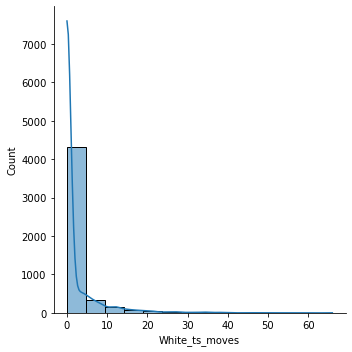

In [53]:
sns.displot(Chess.White_ts_moves, kde = True)
plt.savefig('White_ts_moves')

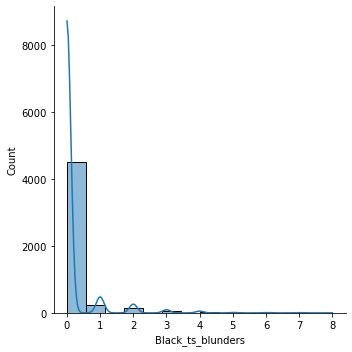

In [54]:
sns.displot(Chess.Black_ts_blunders, kde = True)
plt.savefig('Black_ts_blunders')

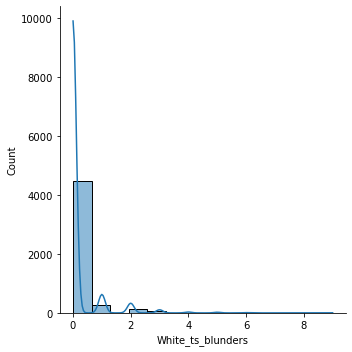

In [55]:
sns.displot(Chess.White_ts_blunders, kde = True)
plt.savefig('White_ts_blunders')

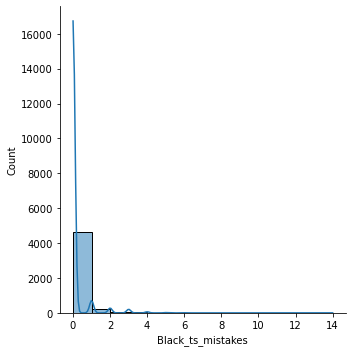

In [56]:
sns.displot(Chess.Black_ts_mistakes, kde = True)
plt.savefig('Black_ts_mistakes')

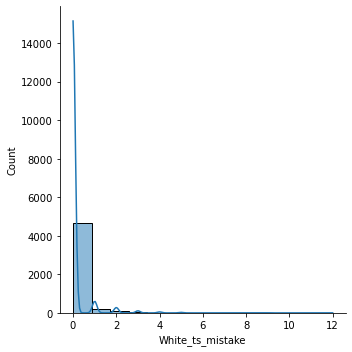

In [57]:
sns.displot(Chess.White_ts_mistake, kde = True)
plt.savefig('White_ts_mistake')

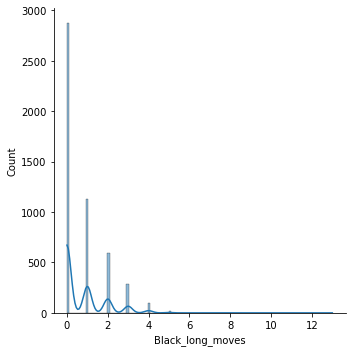

In [58]:
sns.displot(Chess.Black_long_moves, kde = True)
plt.savefig('Black_long_moves')

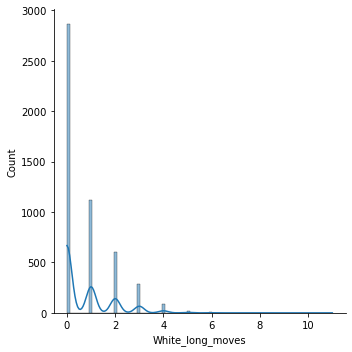

In [59]:
sns.displot(Chess.White_long_moves, kde = True)
plt.savefig('White_long_moves')

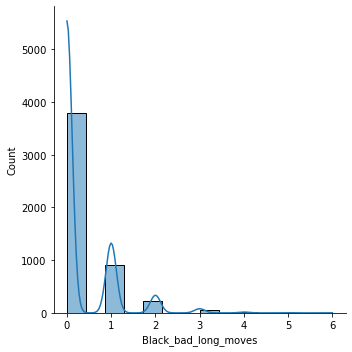

In [60]:
sns.displot(Chess.Black_bad_long_moves, kde = True)
plt.savefig('Black_bad_long_moves')

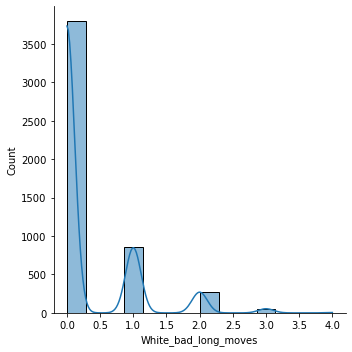

In [61]:
sns.displot(Chess.White_bad_long_moves, kde = True)
plt.savefig('White_bad_long_moves')

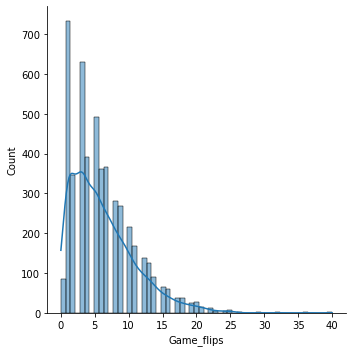

In [62]:
sns.displot(Chess.Game_flips, kde = True)
plt.savefig('Game_flips')

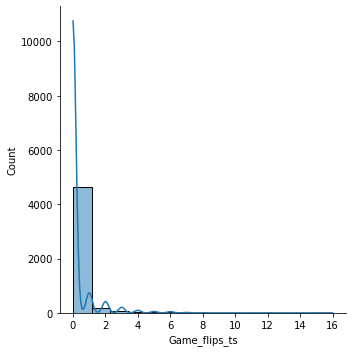

In [63]:
sns.displot(Chess.Game_flips_ts, kde = True)
plt.savefig('Game_flips_ts')

**Create scatter plots for the dataset.**

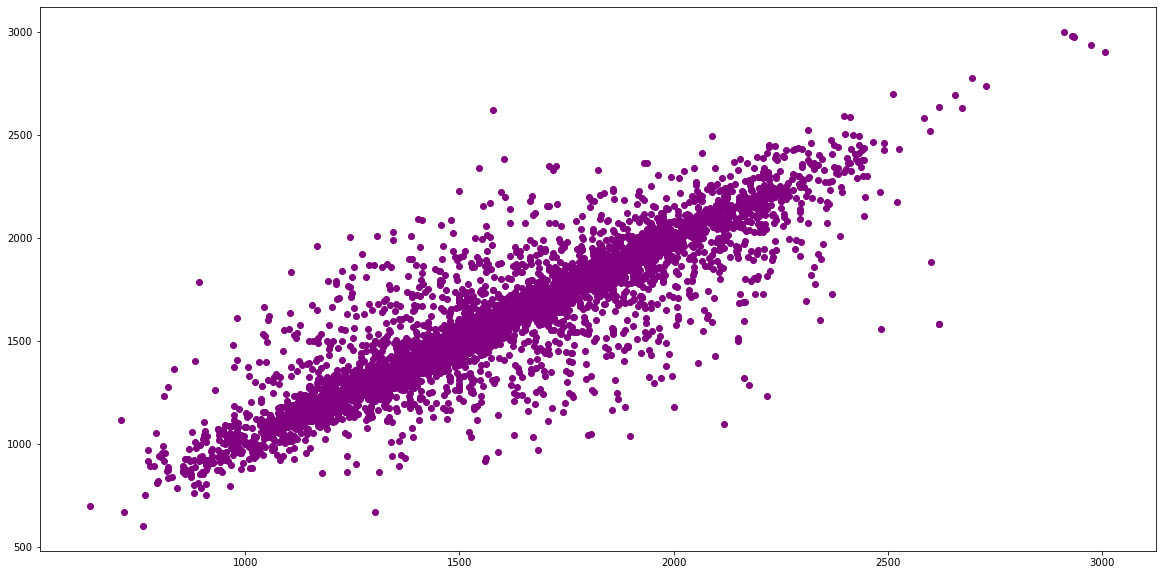

In [67]:
plt.figure(figsize = (20,10))
plt.scatter(Chess.WhiteElo, Chess.BlackElo, color = 'purple', marker = 'o')
plt.savefig('WhiteElo BlackElo Scatter')

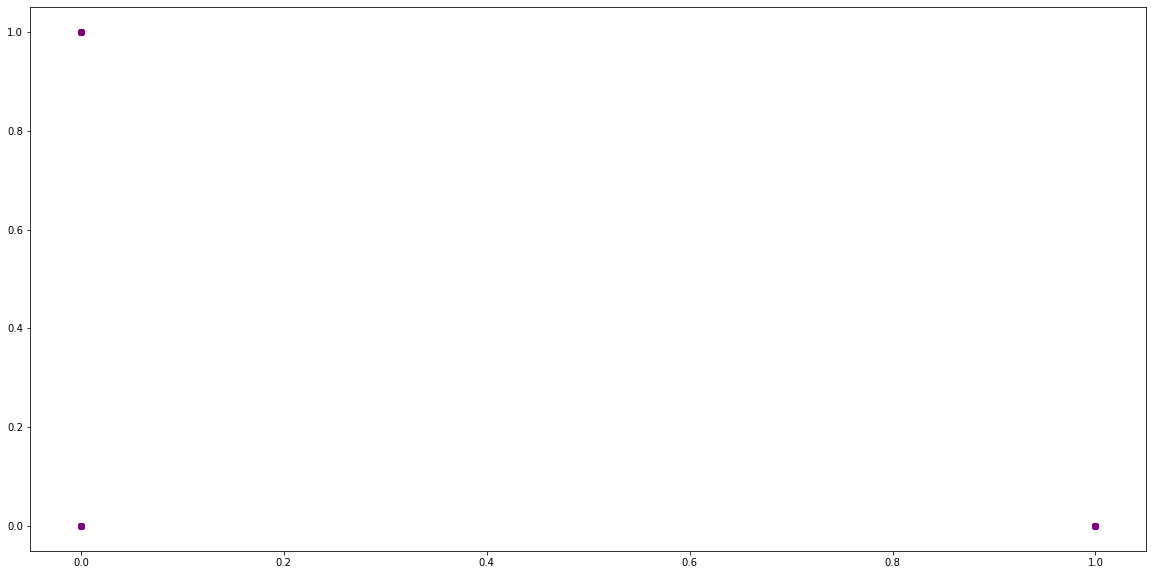

In [68]:
plt.figure(figsize = (20,10))
plt.scatter(Chess.White_Result, Chess.Black_Result, color = 'purple', marker = 'o')
plt.savefig('WhiteBlack Result Scatter')

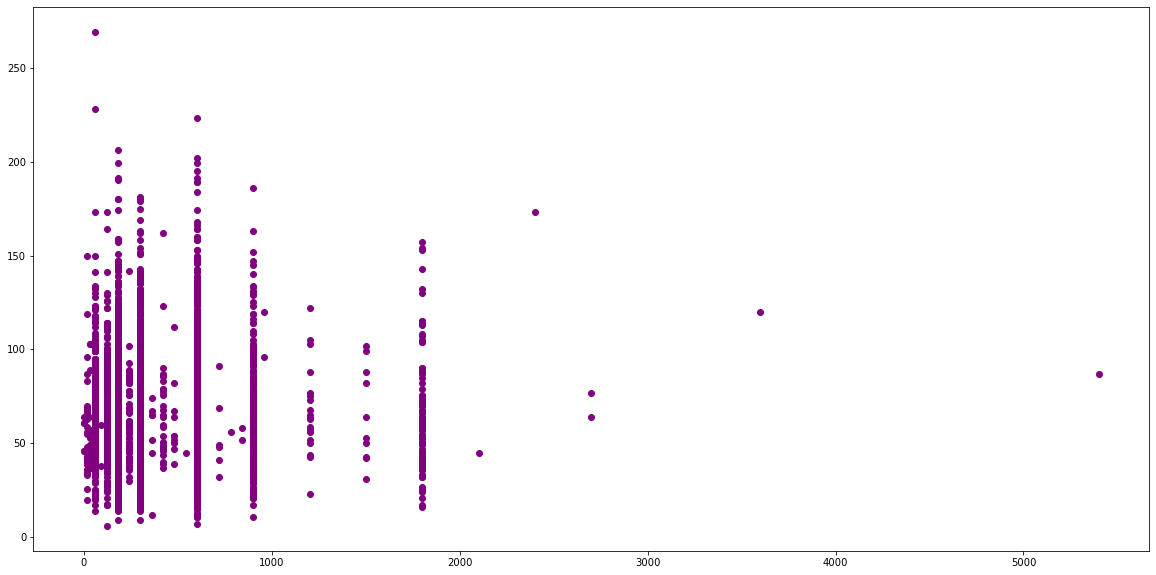

In [69]:
plt.figure(figsize = (20,10))
plt.scatter(Chess.starting_time, Chess.Total_moves, color = 'purple', marker = 'o')
plt.savefig('starting_time total_moves scatter')

**Create bar graphs for each categorical variable.**

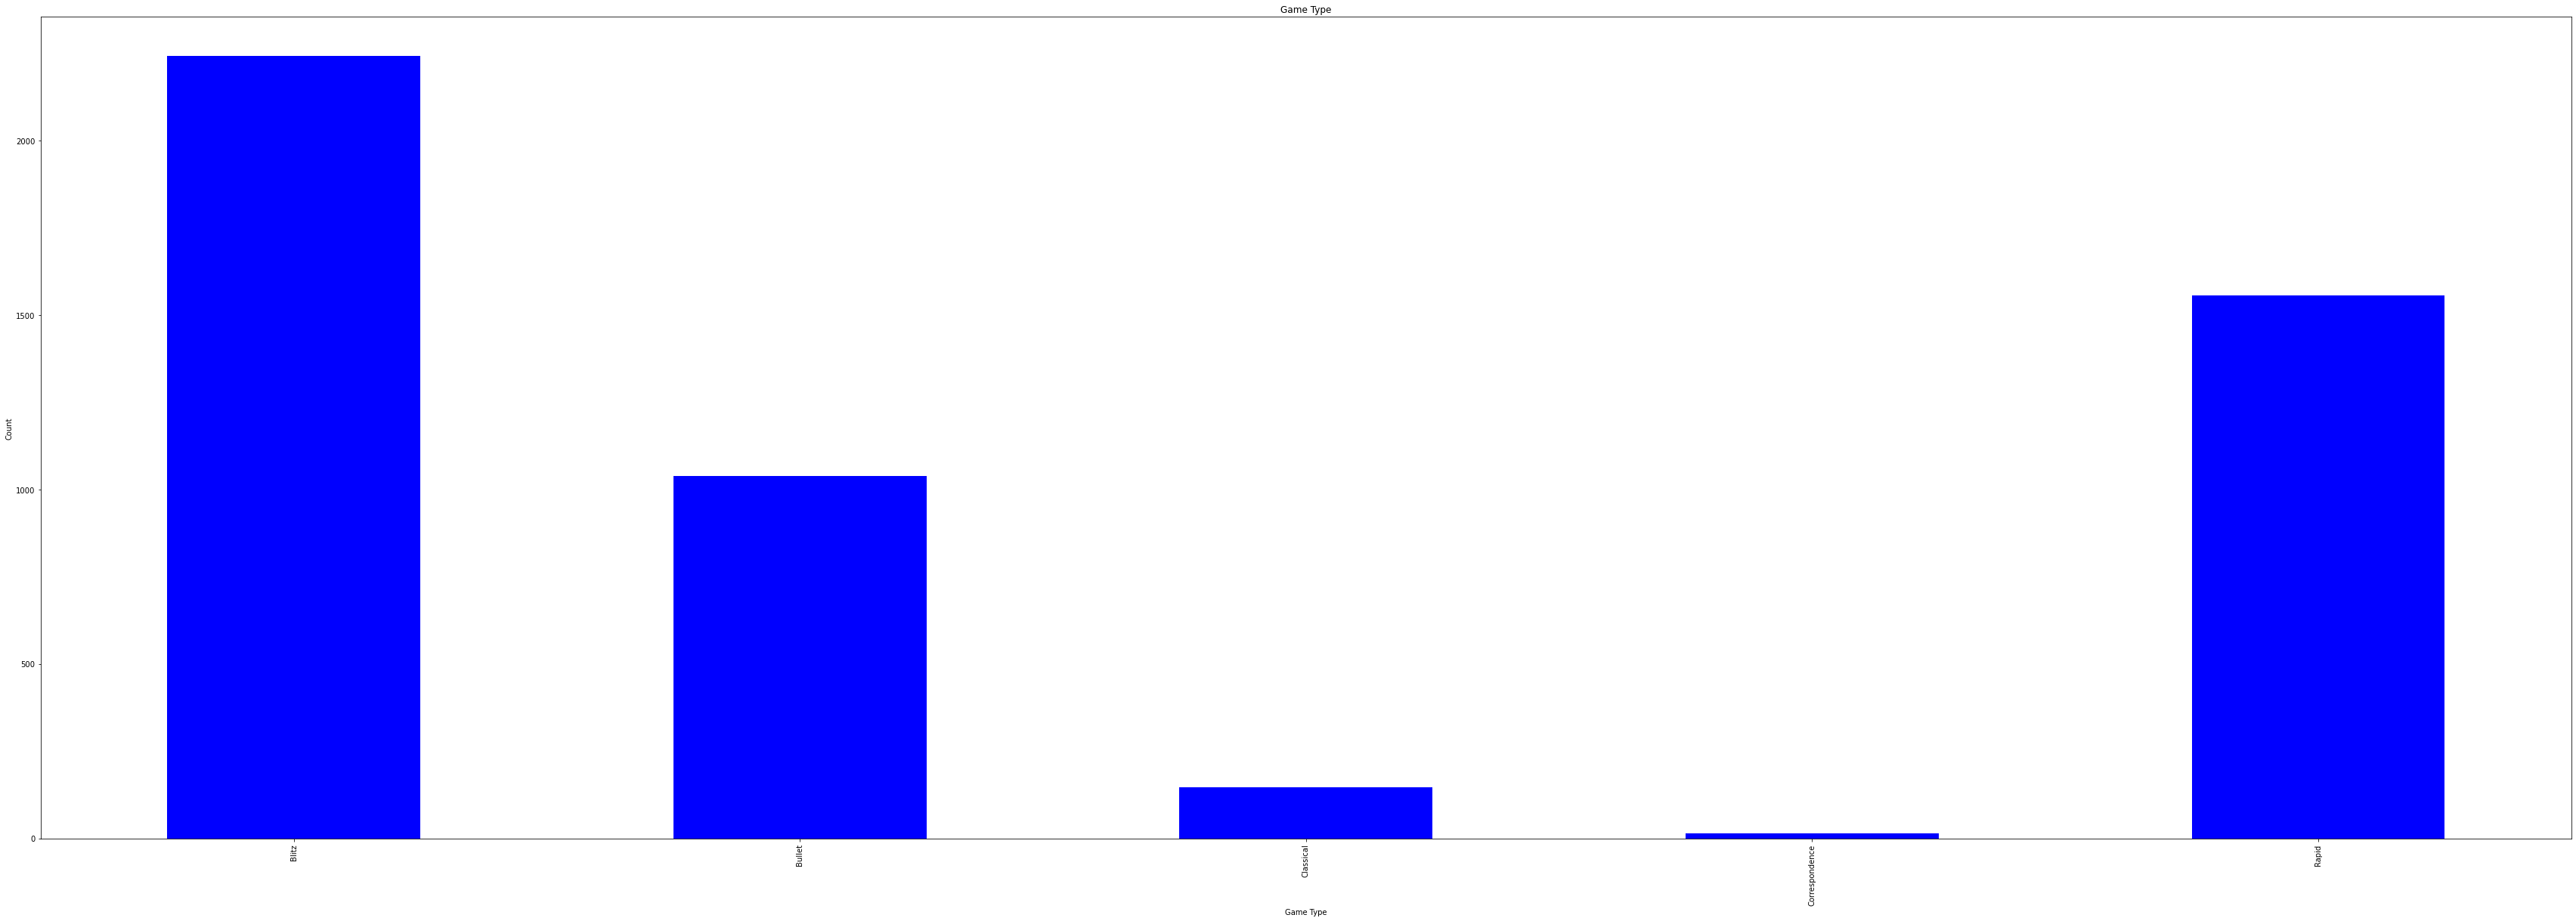

In [70]:
fig = plt.figure(figsize = (60,20))
Chess.Game_type.groupby(Chess.Game_type).count().plot(kind = 
                                                    'bar', title = 'Game Type', xlabel = 'Game Type',
                                                    ylabel = 'Count', color = 'blue')
plt.savefig('Game_type')

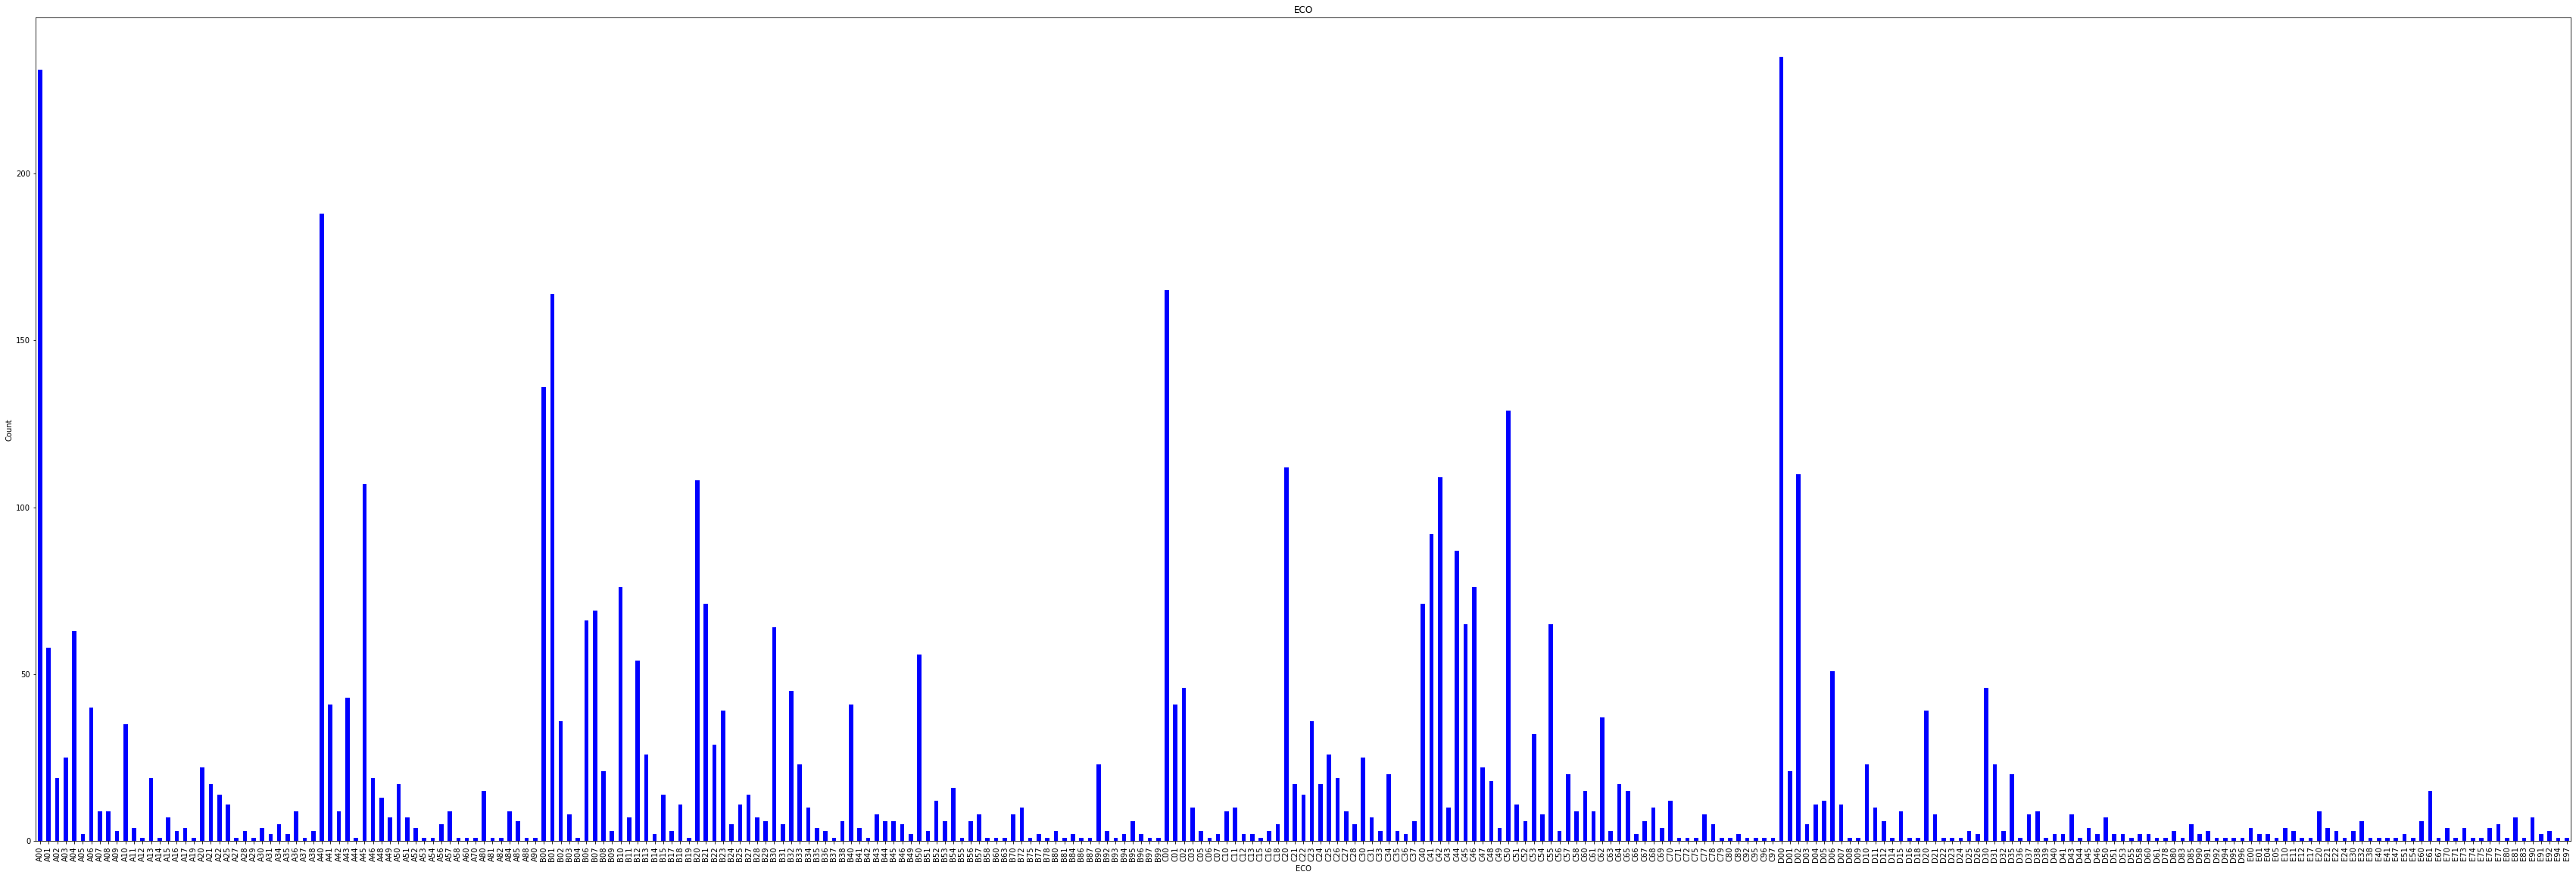

In [71]:
fig = plt.figure(figsize = (60,20))
Chess.ECO.groupby(Chess.ECO).count().plot(kind = 
                                                    'bar', title = 'ECO', xlabel = 'ECO',
                                                    ylabel = 'Count', color = 'blue')
plt.savefig('ECO')

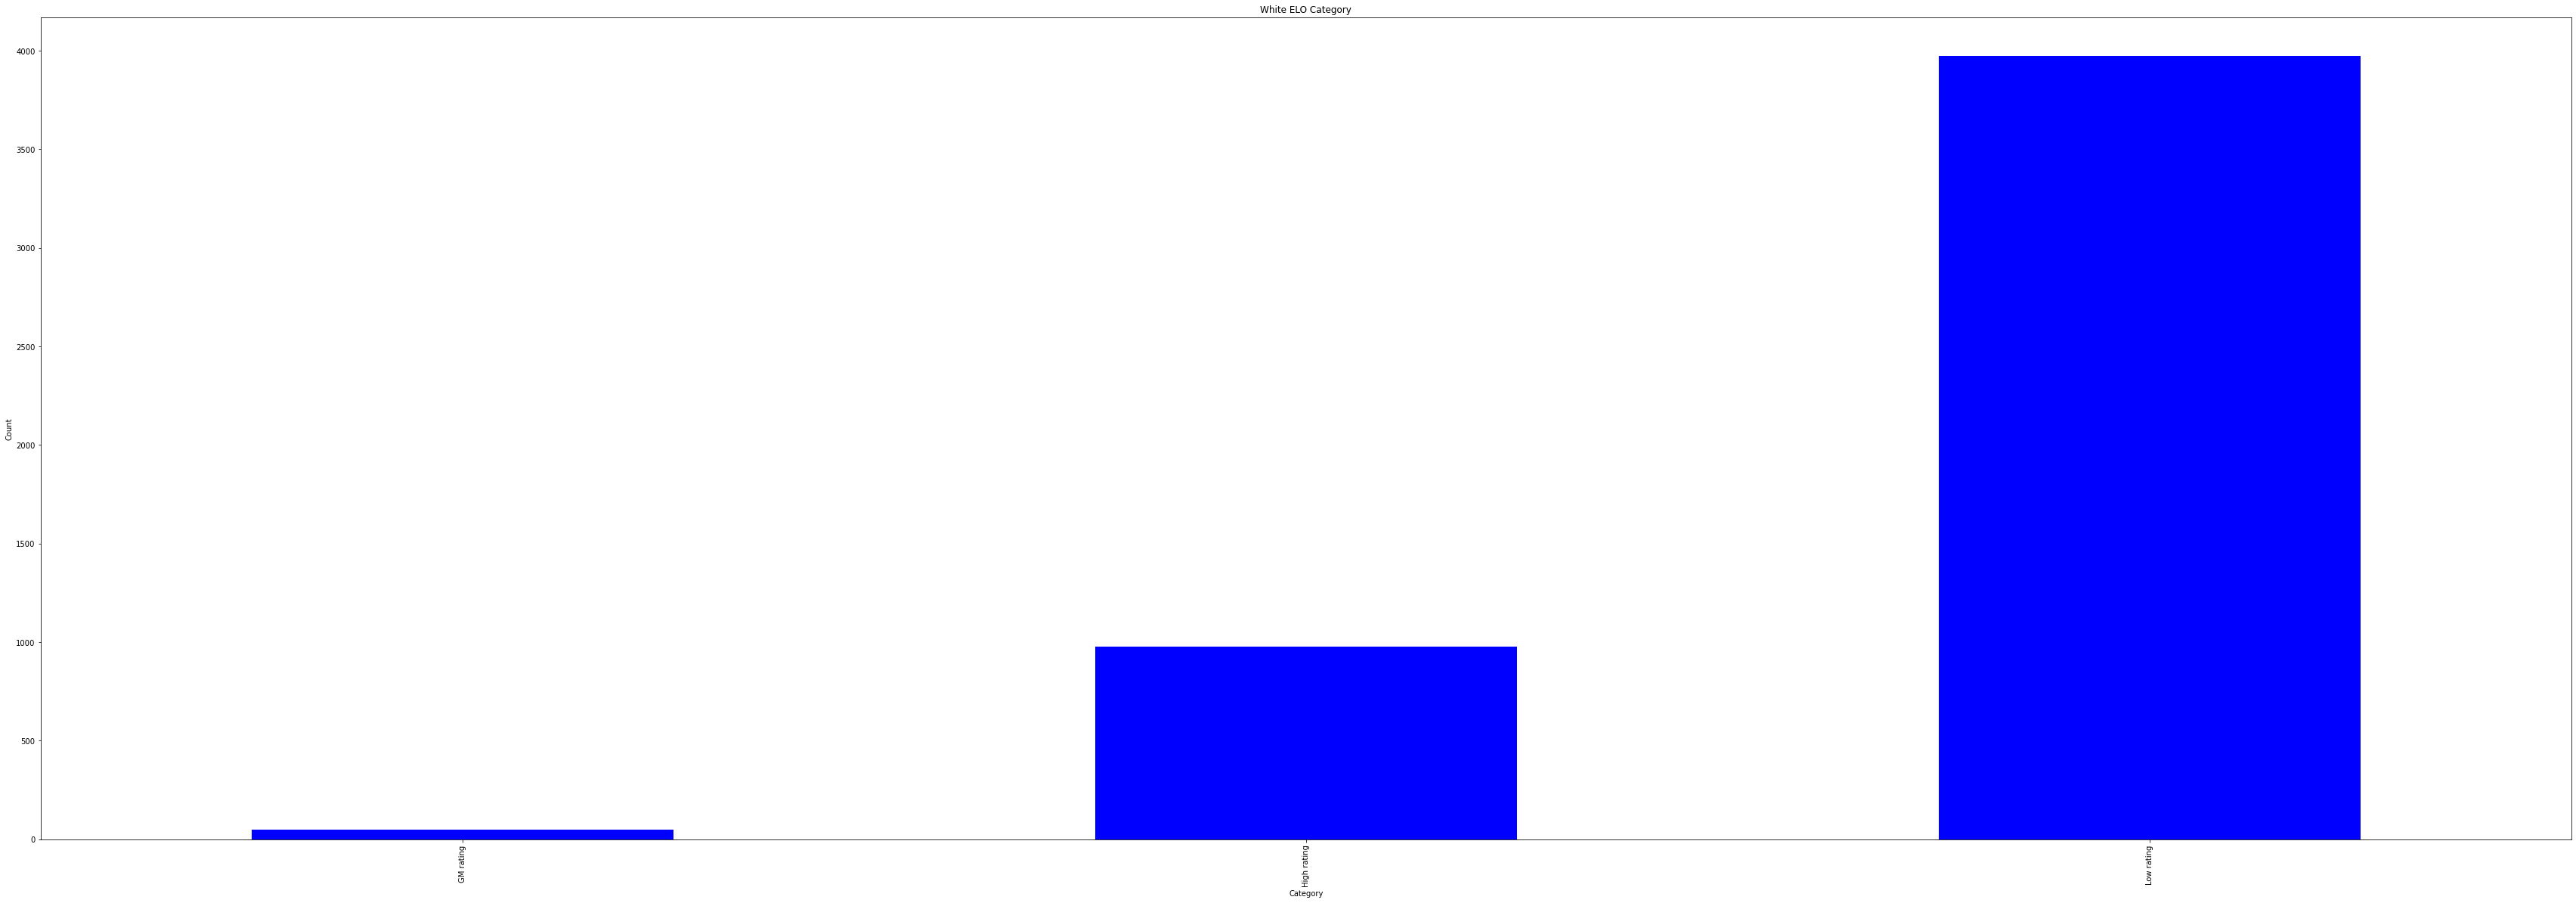

In [72]:
fig = plt.figure(figsize = (60,20))
Chess.White_elo_category.groupby(Chess.White_elo_category).count().plot(kind = 
                                                    'bar', title = 'White ELO Category', xlabel = 'Category',
                                                    ylabel = 'Count', color = 'blue')
plt.savefig('White_elo_category')

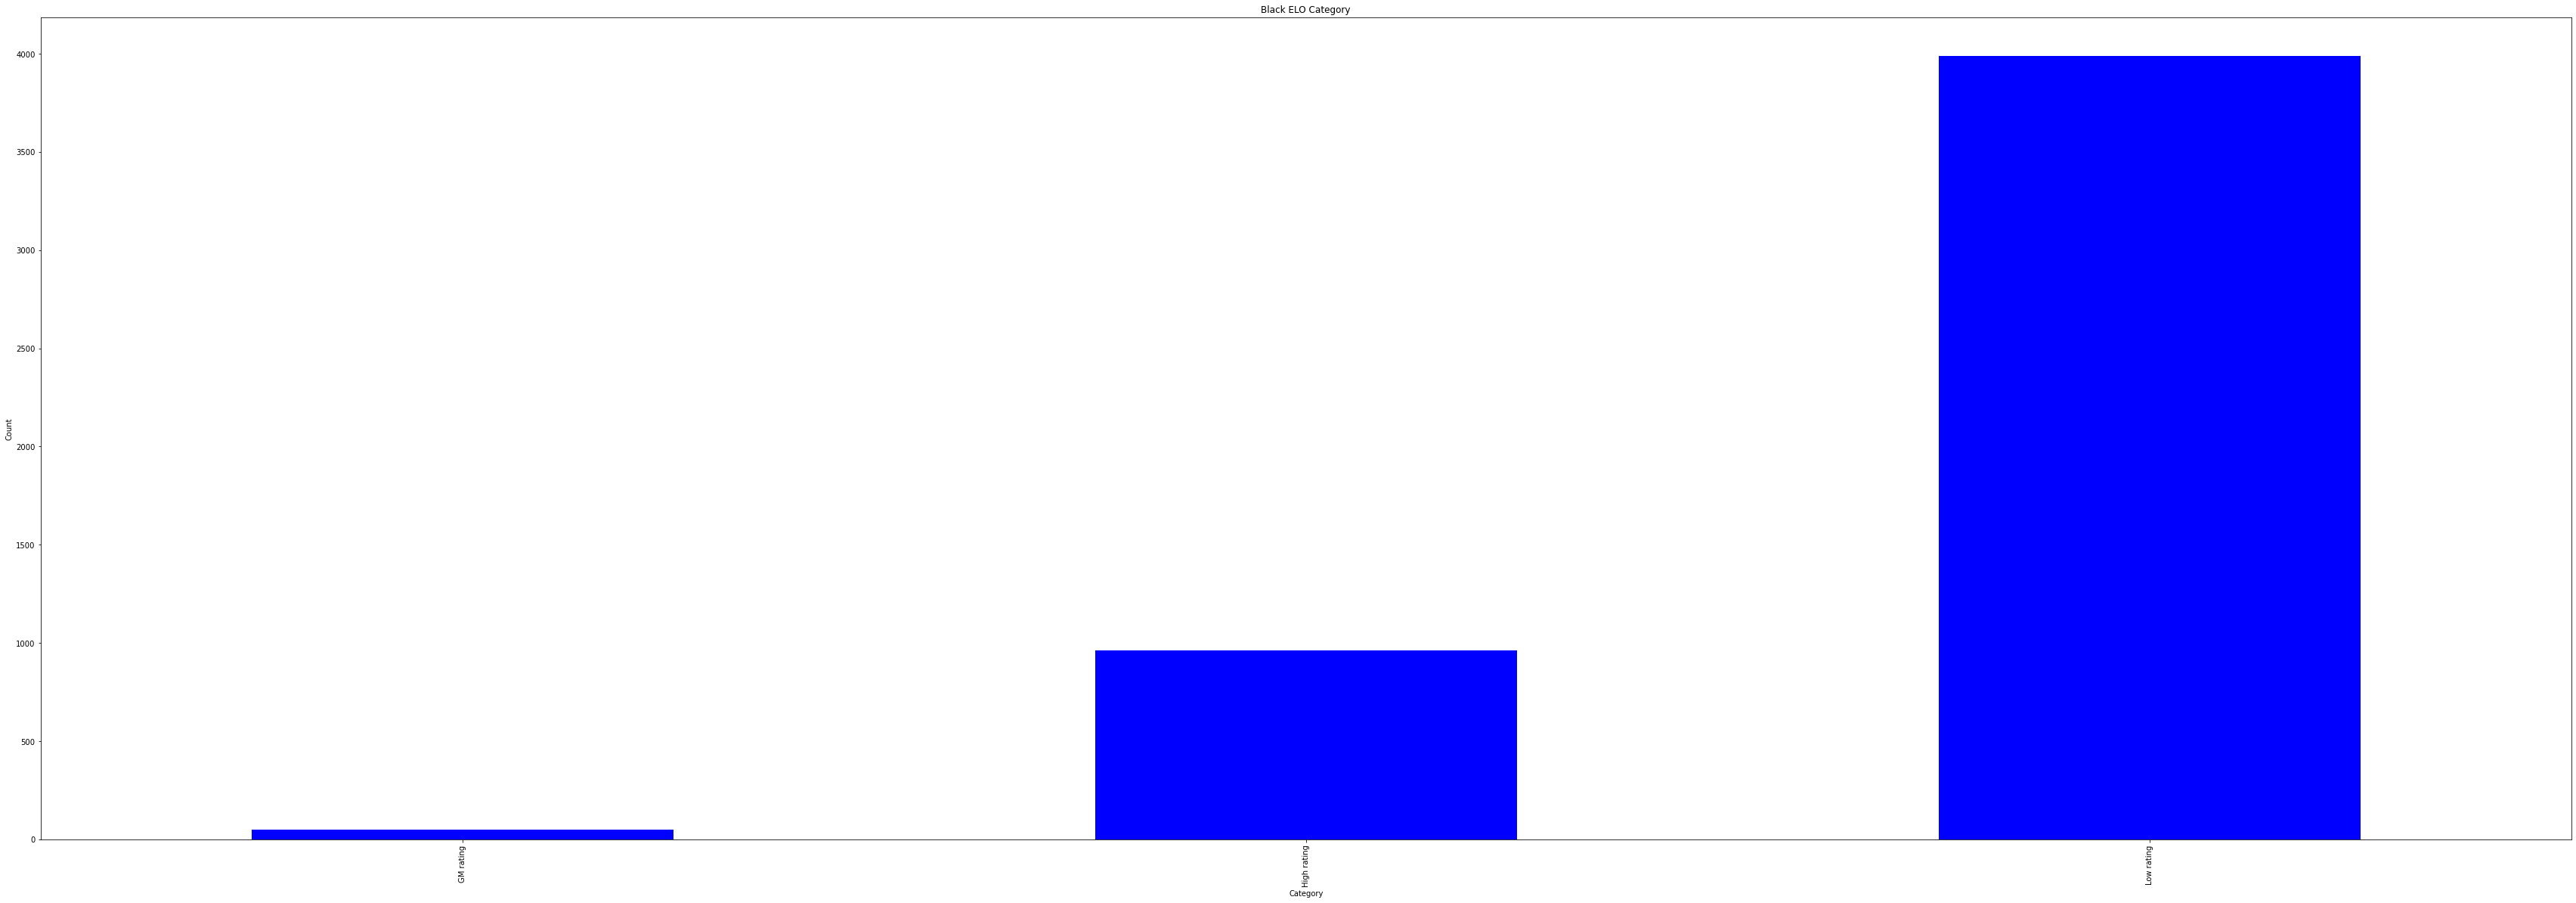

In [73]:
fig = plt.figure(figsize = (60,20))
Chess.Black_elo_category.groupby(Chess.Black_elo_category).count().plot(kind = 
                                                    'bar', title = 'Black ELO Category', xlabel = 'Category',
                                                    ylabel = 'Count', color = 'blue')
plt.savefig('Black_elo_category')

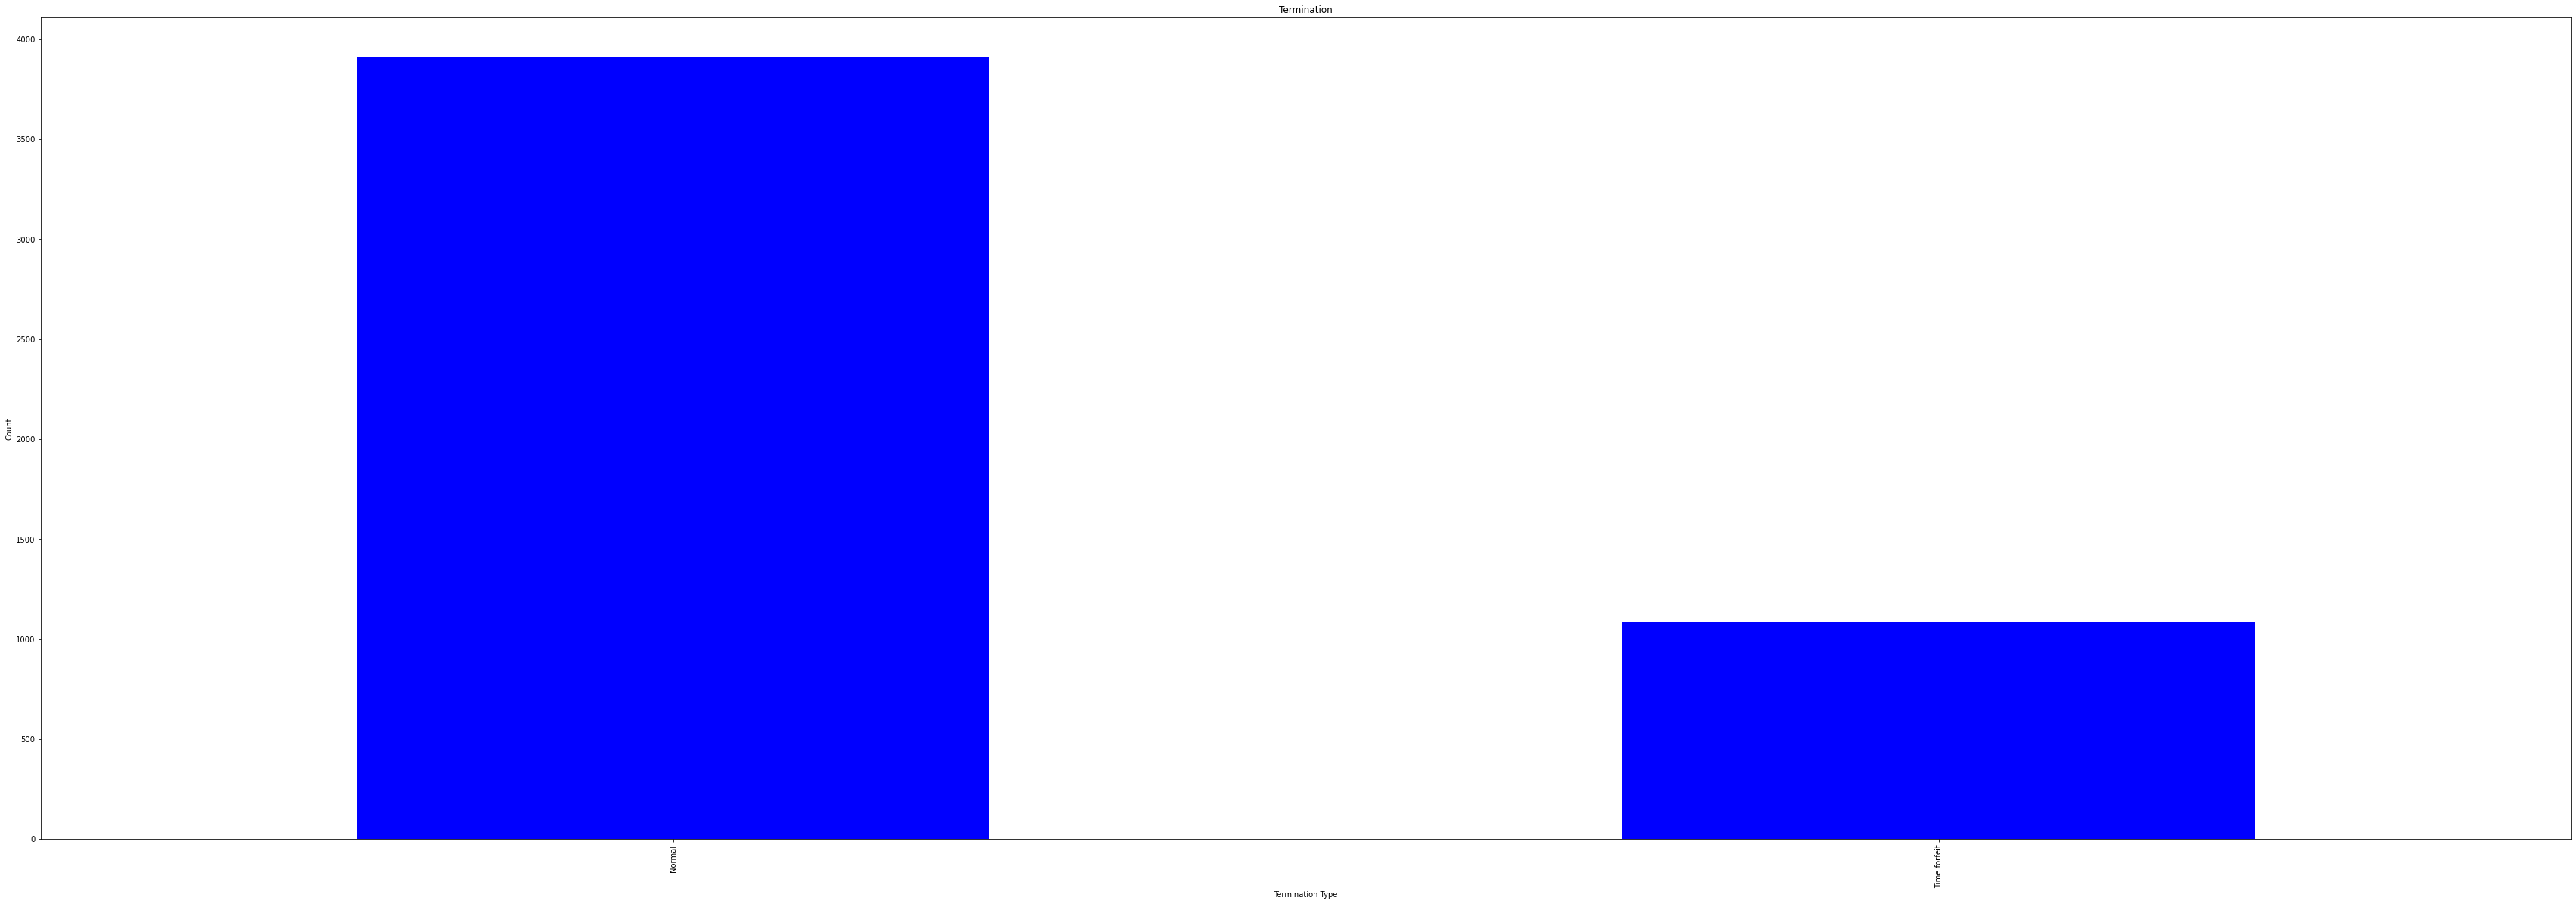

In [74]:
fig = plt.figure(figsize = (60,20))
Chess.Termination.groupby(Chess.Termination).count().plot(kind = 
                                                    'bar', title = 'Termination', xlabel = 'Termination Type',
                                                    ylabel = 'Count', color = 'blue')
plt.savefig('Termination')

## **Part 2: Data Preparation**

**Dropping excess Columns from the new Dataframe.**

In [75]:
ChessML = Chess.drop(columns = ['Date', 'ECO', 'Termination', 'TimeControl', 'UTCTime', 'Black_elo_category', 'White_elo_category', 'increment', 'Game_type'])

In [76]:
ChessML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GAME                  4998 non-null   int64  
 1   BlackElo              4998 non-null   int64  
 2   BlackRatingDiff       4983 non-null   float64
 3   White_Result          4998 non-null   int64  
 4   Black_Result          4998 non-null   int64  
 5   WhiteElo              4998 non-null   int64  
 6   WhiteRatingDiff       4983 non-null   float64
 7   starting_time         4983 non-null   float64
 8   Total_moves           4998 non-null   int64  
 9   Black_blunders        4998 non-null   int64  
 10  White_blunders        4998 non-null   int64  
 11  Black_mistakes        4998 non-null   int64  
 12  White_mistakes        4998 non-null   int64  
 13  Black_inaccuracies    4998 non-null   int64  
 14  White_inaccuracies    4998 non-null   int64  
 15  Black_inferior_moves 

**Creating a raw elo difference column so that negatives and NaN don't appear.**

In [77]:
ChessML['Rating Difference'] = (ChessML['WhiteElo']-ChessML['BlackElo']).abs()

**Dropping some other columns here too for some ease of calculation.**

In [78]:
ChessML = ChessML.drop(columns=['BlackRatingDiff', 'WhiteRatingDiff'])

**Gather some descriptive information on new DataFrame.**

In [79]:
ChessML.sample(5)

,GAME,BlackElo,White_Result,Black_Result,WhiteElo,starting_time,Total_moves,Black_blunders,White_blunders,Black_mistakes,White_mistakes,Black_inaccuracies,White_inaccuracies,Black_inferior_moves,White_inferior_moves,Black_ts_moves,White_ts_moves,Black_ts_blunders,White_ts_blunders,Black_ts_mistakes,White_ts_mistake,Black_long_moves,White_long_moves,Black_bad_long_moves,White_bad_long_moves,Game_flips,Game_flips_ts,Rating Difference
2986,51536,1787,1,0,1766,60.0,73,2,4,11,7,3,7,16,18,4,0,1,0,1,0,1,0,0,0,25,0,21
2749,47442,1879,0,1,1898,60.0,78,3,3,6,4,2,2,11,9,3,10,0,1,0,2,0,2,0,0,7,1,19
2762,47665,1620,1,0,1602,180.0,49,2,2,2,3,4,4,8,9,0,0,0,0,0,0,1,1,0,0,5,0,18
1292,22513,1435,1,0,1419,180.0,85,8,8,7,4,6,4,21,16,0,0,0,0,0,0,0,0,0,0,12,0,16
4078,70223,2291,0,1,2184,600.0,72,1,3,2,3,4,3,7,9,0,0,0,0,0,0,0,0,0,0,8,0,107


In [80]:
ChessML.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GAME                  4998 non-null   int64  
 1   BlackElo              4998 non-null   int64  
 2   White_Result          4998 non-null   int64  
 3   Black_Result          4998 non-null   int64  
 4   WhiteElo              4998 non-null   int64  
 5   starting_time         4983 non-null   float64
 6   Total_moves           4998 non-null   int64  
 7   Black_blunders        4998 non-null   int64  
 8   White_blunders        4998 non-null   int64  
 9   Black_mistakes        4998 non-null   int64  
 10  White_mistakes        4998 non-null   int64  
 11  Black_inaccuracies    4998 non-null   int64  
 12  White_inaccuracies    4998 non-null   int64  
 13  Black_inferior_moves  4998 non-null   int64  
 14  White_inferior_moves  4998 non-null   int64  
 15  Black_ts_moves       

In [81]:
ChessML.isna().mean().round(10)*100

GAME                    0.00000
BlackElo                0.00000
White_Result            0.00000
Black_Result            0.00000
WhiteElo                0.00000
starting_time           0.30012
Total_moves             0.00000
Black_blunders          0.00000
White_blunders          0.00000
Black_mistakes          0.00000
White_mistakes          0.00000
Black_inaccuracies      0.00000
White_inaccuracies      0.00000
Black_inferior_moves    0.00000
White_inferior_moves    0.00000
Black_ts_moves          0.00000
White_ts_moves          0.00000
Black_ts_blunders       0.00000
White_ts_blunders       0.00000
Black_ts_mistakes       0.00000
White_ts_mistake        0.00000
Black_long_moves        0.00000
White_long_moves        0.00000
Black_bad_long_moves    0.00000
White_bad_long_moves    0.00000
Game_flips              0.00000
Game_flips_ts           0.00000
Rating Difference       0.00000
dtype: float64

In [82]:
ChessML = ChessML.reset_index()

In [83]:
ChessML.head()

,index,GAME,BlackElo,White_Result,Black_Result,WhiteElo,starting_time,Total_moves,Black_blunders,White_blunders,Black_mistakes,White_mistakes,Black_inaccuracies,White_inaccuracies,Black_inferior_moves,White_inferior_moves,Black_ts_moves,White_ts_moves,Black_ts_blunders,White_ts_blunders,Black_ts_mistakes,White_ts_mistake,Black_long_moves,White_long_moves,Black_bad_long_moves,White_bad_long_moves,Game_flips,Game_flips_ts,Rating Difference
0,0,11,1143,0,1,1180,300.0,66,4,2,0,3,3,1,7,6,8,8,0,0,0,0,2,1,1,1,8,0,37
1,1,14,1504,0,1,1381,300.0,64,2,1,1,1,7,5,10,7,0,0,0,0,0,0,0,1,0,0,6,0,123
2,2,29,1933,0,1,1485,300.0,70,0,1,1,2,8,8,9,11,0,2,0,0,0,0,1,1,1,0,5,0,448
3,3,40,1710,0,1,2040,180.0,86,4,2,1,5,3,4,8,11,18,0,4,0,0,0,3,1,1,0,8,1,330
4,4,55,1598,1,0,2163,600.0,71,1,0,1,1,6,2,8,3,0,0,0,0,0,0,0,0,0,0,2,0,565


**Dropping all results that were draws to create the binary variable.**

In [84]:
ChessML.drop(ChessML.index[ChessML['Black_Result'] == '0.5'], inplace = True)

In [85]:
ChessML.drop(ChessML.index[ChessML['White_Result'] == '0.5'], inplace = True)

## **Part 3: Machine Learning Analysis**

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [87]:
X = np.array(ChessML[['BlackElo', 'WhiteElo', 'Total_moves','Black_blunders', 'White_blunders', 'Black_mistakes', 'White_mistakes', 'Black_inaccuracies', 'White_inaccuracies', 'Black_inferior_moves', 'White_inferior_moves', 'Black_ts_moves', 'White_ts_moves', 'Black_ts_blunders', 'White_ts_blunders', 'Black_ts_mistakes', 'White_ts_mistake', 'Black_long_moves', 'White_long_moves','Black_bad_long_moves', 'White_bad_long_moves', 'Game_flips', 'Game_flips_ts', 'Rating Difference']])
y = np.array(ChessML['Black_Result'])

## **A. 80/10/10**

**Validate**

In [88]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.80, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.10, random_state=42)

In [89]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [90]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

**Prediction**

In [91]:
y_validate_pred = knn_model.predict(x_validate)

In [92]:
y_validate_pred

array([0, 1, 0, ..., 0, 0, 1])

In [93]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [94]:
print(accuracy, precision, recall, f1)

0.5293136982495138 0.4887640449438202 0.4187725631768953 0.4510693454309786


**Test**

In [95]:
y_pred = knn_model.predict(x_test)

In [96]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [97]:
print(accuracy, precision, recall, f1)

0.535 0.5769230769230769 0.42857142857142855 0.4918032786885245


**ROC Curves**

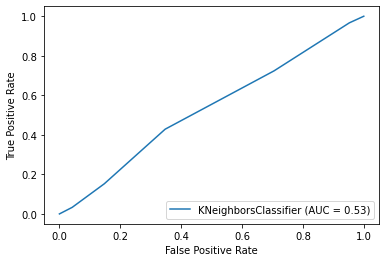

In [98]:
roc = metrics.plot_roc_curve(knn_model,x_test, y_test)

In [99]:
y_score = knn_model.predict_proba(x_test)[:,1]

In [100]:
y_score

array([0.4, 0.6, 0.4, 0.2, 0.4, 1. , 0.6, 0. , 0.6, 0.8, 0.6, 0.8, 0.4,
       0.2, 0.4, 0.2, 0.6, 0.6, 0.4, 0.2, 0.2, 0.4, 0.6, 0.6, 0.4, 0.6,
       0.2, 0.6, 0.2, 0.4, 0.6, 0.2, 0.4, 0.4, 0.6, 0.4, 0.4, 0.2, 0.2,
       0.4, 0.6, 0.4, 0.4, 0.2, 0.4, 1. , 0. , 0.6, 0.4, 0.2, 0.2, 0.4,
       0.2, 0.2, 0.4, 0.4, 0.8, 0.4, 0.2, 0.4, 0.2, 0.4, 0.6, 0.8, 0.6,
       0.2, 0.4, 0.8, 0.4, 0.4, 0.2, 1. , 0.2, 0.8, 0.6, 1. , 0.6, 0.4,
       0.8, 0.6, 0.4, 0. , 0.8, 0.4, 0.6, 0.2, 0.2, 0.6, 1. , 0.2, 0.2,
       0.4, 0.4, 0.2, 0. , 0.6, 0.4, 0.4, 0.8, 0. , 0.6, 0.6, 0.8, 0.4,
       0.8, 0.4, 0.8, 0.4, 0.2, 0.8, 0.6, 0.8, 0.4, 0.6, 0.2, 0.2, 0.2,
       0.2, 0.4, 0.4, 0.2, 0.6, 0.8, 0. , 0.4, 0.6, 0.2, 0.4, 0.6, 0.2,
       0.8, 0.4, 0.2, 0.4, 0.8, 0.8, 0.2, 0.4, 1. , 0. , 0.6, 0.4, 0.4,
       0.4, 0.4, 0.2, 0.4, 0.6, 1. , 0.8, 0.8, 0.2, 0.8, 0.6, 0.6, 0.4,
       0.2, 0.4, 0.8, 0.4, 0.2, 0.6, 0.6, 0.2, 0.6, 0.4, 0.2, 0.4, 0.6,
       0.4, 0.4, 0.4, 0. , 0.2, 0.6, 0.6, 0.2, 0.8, 1. , 0.6, 0.

In [101]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_score)

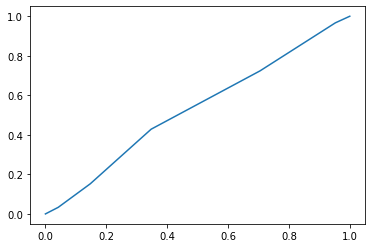

In [102]:
plt.plot(fpr,tpr)

**Logistic Regression**

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
clf = LogisticRegression().fit(x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
y_pred = clf.predict(x_validate)

In [106]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [107]:
print(accuracy, precision, recall, f1)

0.5293136982495138 0.4887640449438202 0.4187725631768953 0.4510693454309786


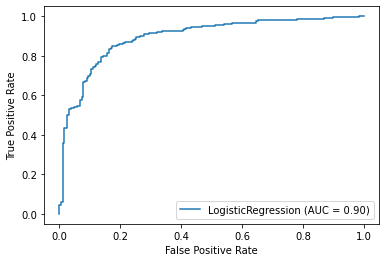

In [108]:
roc = metrics.plot_roc_curve(clf,x_test, y_test)

**Cross Validation**

In [109]:
from sklearn.model_selection import cross_val_score

In [110]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.80, random_state=42)

In [111]:
lr_model = LogisticRegression().fit(x_train,y_train)
knn_model = KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
scores =cross_val_score(lr_model, x_validate, y_validate, cv=5) 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [113]:
scores

array([0.85      , 0.79583333, 0.84444444, 0.84583333, 0.86648122])

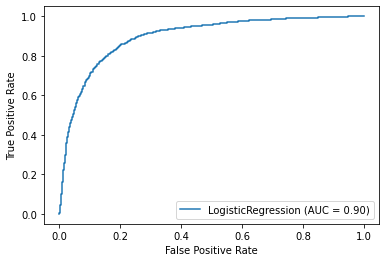

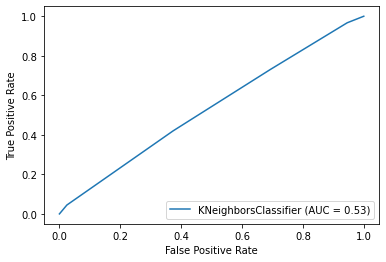

In [114]:
metrics.plot_roc_curve(lr_model,x_test, y_test)
metrics.plot_roc_curve(knn_model,x_test, y_test)

## **B. 70/15/15**

**Validate**

In [115]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.70, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.15, random_state=42)

In [116]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [117]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

**Prediction**

In [118]:
y_validate_pred = knn_model.predict(x_validate)

In [119]:
y_validate_pred

array([0, 0, 1, ..., 0, 0, 1])

In [120]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [121]:
print(accuracy, precision, recall, f1)

0.5205110961667787 0.48440065681444994 0.4250720461095101 0.4528012279355334


**Test**

In [122]:
y_pred = knn_model.predict(x_test)

In [123]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [124]:
print(accuracy, precision, recall, f1)

0.5542857142857143 0.5530973451327433 0.4844961240310077 0.5165289256198347


**ROC Curves**

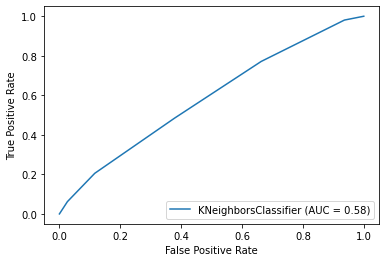

In [125]:
roc = metrics.plot_roc_curve(knn_model,x_test, y_test)

In [126]:
y_score = knn_model.predict_proba(x_test)[:,1]

In [127]:
y_score

array([0.6, 0.4, 0.4, 0.2, 0.8, 0.6, 0.4, 0.2, 0.2, 0.8, 0.6, 0.6, 0.4,
       0.4, 0.2, 0. , 1. , 0.2, 0.4, 0.4, 0.6, 0.4, 0.4, 0.6, 0.6, 0.2,
       0.6, 0.4, 0. , 0.2, 0. , 1. , 0.2, 0.2, 0.2, 0.2, 0.4, 0.6, 0.2,
       0.4, 0.4, 0.2, 0.4, 0.2, 0.4, 0.4, 0.6, 0.6, 0.2, 0.6, 0.2, 0.6,
       0.8, 0.2, 0.6, 0.2, 0.4, 0. , 0.8, 1. , 0. , 0.4, 0. , 0.6, 0.6,
       0.4, 0.2, 0.2, 0.4, 0. , 0.8, 0.4, 0.6, 0.8, 0.2, 0.2, 0.4, 0.8,
       0.8, 0.4, 0.2, 0.2, 0.6, 0.6, 0.6, 0.2, 0.8, 0.6, 0.2, 0.6, 0.4,
       1. , 0.4, 0.4, 0.6, 0.2, 1. , 0.2, 0.4, 0.2, 0.4, 0.6, 0.2, 0.4,
       0.4, 1. , 0.4, 0.4, 0.2, 0.4, 0.6, 0.2, 0.6, 0.4, 0.6, 0.6, 0.8,
       0.4, 1. , 0.6, 0.8, 0. , 0.6, 0.6, 0.4, 0.6, 0.8, 0.4, 0.8, 0.2,
       0.4, 0.4, 0.6, 0.6, 0.6, 0.2, 0.2, 0. , 0.8, 0.4, 0.2, 0.2, 0.6,
       0.6, 0.4, 0.8, 0.6, 0.8, 0.2, 0.6, 0.4, 0.6, 0.2, 0.4, 0.4, 0.8,
       0.2, 0.6, 0.6, 0.4, 0.6, 0.2, 0.6, 0.8, 0.4, 0.2, 0.8, 0.2, 0.4,
       0.4, 0.4, 0.6, 0.4, 0.2, 0.2, 0.2, 0.4, 0.6, 1. , 0.6, 0.

In [128]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_score)

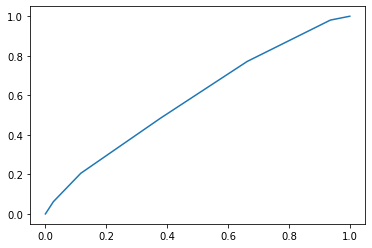

In [129]:
plt.plot(fpr,tpr)

**Logistic Regression**

In [130]:
clf = LogisticRegression().fit(x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [131]:
y_pred = clf.predict(x_validate)

In [132]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [133]:
print(accuracy, precision, recall, f1)

0.5205110961667787 0.48440065681444994 0.4250720461095101 0.4528012279355334


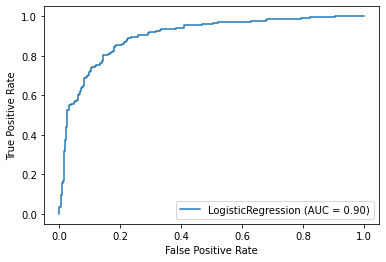

In [134]:
roc = metrics.plot_roc_curve(clf,x_test, y_test)

**Cross Validation**

In [135]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.70, random_state=42)

In [136]:
lr_model = LogisticRegression().fit(x_train,y_train)
knn_model = KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [137]:
scores =cross_val_score(lr_model, x_validate, y_validate, cv=5) 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [138]:
scores

array([0.82689076, 0.80504202, 0.86890756, 0.81008403, 0.82996633])

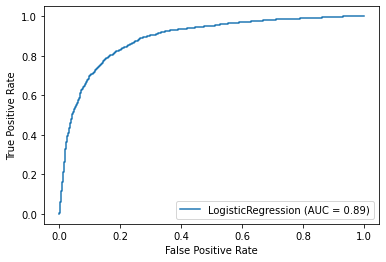

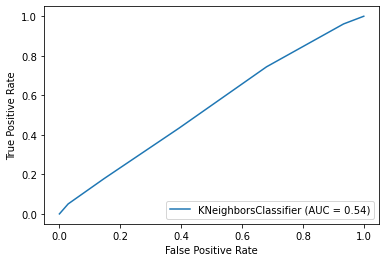

In [139]:
metrics.plot_roc_curve(lr_model,x_test, y_test)
metrics.plot_roc_curve(knn_model,x_test, y_test)

## **C. 60/20/20**

**Validate**

In [140]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.60, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.20, random_state=42)

In [141]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [142]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

**Prediction**

In [143]:
y_validate_pred = knn_model.predict(x_validate)

In [144]:
y_validate_pred

array([1, 0, 0, ..., 0, 1, 0])

In [145]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [146]:
print(accuracy, precision, recall, f1)

0.531471446436015 0.5112016293279023 0.43804537521815007 0.47180451127819545


**Test**

In [147]:
y_pred = knn_model.predict(x_test)

In [148]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)

In [149]:
print(accuracy, precision, recall, f1)

0.55 0.5409836065573771 0.45517241379310347 0.49438202247191015


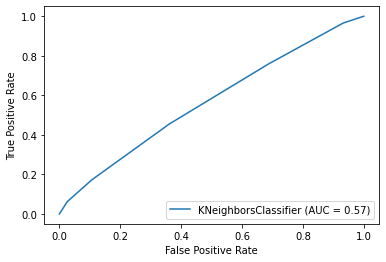

In [150]:
roc = metrics.plot_roc_curve(knn_model,x_test, y_test)

In [151]:
y_score = knn_model.predict_proba(x_test)[:,1]

In [152]:
y_score

array([0.6, 0. , 0.6, 0.4, 0. , 0.4, 1. , 0.2, 0.8, 0.8, 0.4, 0.4, 0.6,
       0.4, 0.4, 0.4, 0.2, 0.4, 1. , 0.6, 0.4, 0.2, 0.6, 0.4, 0.6, 0.8,
       1. , 0.6, 0.6, 0.6, 0.2, 0.6, 0.6, 0.2, 0.2, 0.4, 0.2, 1. , 0.2,
       0.4, 0.4, 0.6, 0.2, 0.4, 0.4, 0.8, 0.2, 0.8, 0.4, 0.2, 0.4, 0.6,
       0.4, 0.6, 0.8, 0.2, 0.8, 0.6, 0.4, 0.8, 0.4, 0.2, 0.8, 0.8, 0.4,
       0.4, 0.4, 1. , 0.8, 0.4, 0.4, 0.2, 0.6, 0.6, 0.6, 0.8, 0.6, 0.6,
       0.8, 0. , 0.2, 0.6, 0.2, 0.6, 0.6, 0.2, 0.4, 0.2, 0.4, 0.2, 0.4,
       0.6, 0.4, 0.4, 0.8, 0.4, 0.6, 0.4, 0.8, 0.4, 0. , 0.6, 0.4, 0.4,
       0.6, 1. , 0.6, 0.6, 0. , 0.2, 0.6, 0.4, 0.2, 0.4, 0.2, 0.4, 0.4,
       0.4, 0. , 0.6, 0.2, 0.8, 0.2, 0.4, 0.6, 0.4, 0.2, 0.6, 0.2, 0.4,
       0.2, 0.6, 0.6, 0.4, 0.4, 0.4, 0.6, 0.2, 1. , 0.6, 0.4, 0.8, 0.2,
       0. , 0.2, 0.2, 0.6, 0.2, 0.4, 0. , 0.6, 0.2, 0.6, 0.2, 0.4, 0.4,
       0.4, 0.4, 0.8, 0.4, 0.8, 0.2, 0. , 0.4, 0.6, 0.2, 0.6, 0.8, 0.4,
       0.6, 0.4, 0.6, 0.2, 0.6, 0.2, 0.2, 0.4, 0.4, 0.6, 0.2, 0.

In [153]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_score)

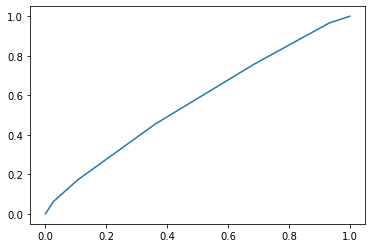

In [154]:
plt.plot(fpr,tpr)

**Logistic Regression**

In [155]:
clf = LogisticRegression().fit(x_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [156]:
y_pred = clf.predict(x_validate)

In [157]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)
recall = metrics.recall_score(y_validate,y_validate_pred)
f1 = metrics.f1_score(y_validate,y_validate_pred)

In [158]:
print(accuracy, precision, recall, f1)

0.531471446436015 0.5112016293279023 0.43804537521815007 0.47180451127819545


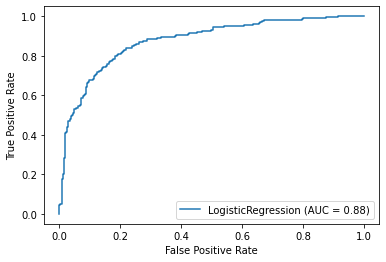

In [159]:
roc = metrics.plot_roc_curve(clf,x_test, y_test)

**Cross Validate**

In [160]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.60, random_state=42)

In [161]:
lr_model = LogisticRegression().fit(x_train,y_train)
knn_model = KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [162]:
scores =cross_val_score(lr_model, x_validate, y_validate, cv=10)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [163]:
scores

array([0.80833333, 0.89583333, 0.875     , 0.85416667, 0.8375    ,
       0.84166667, 0.80833333, 0.85416667, 0.82083333, 0.85774059])

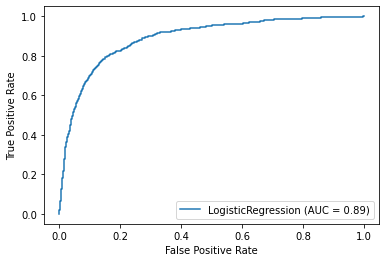

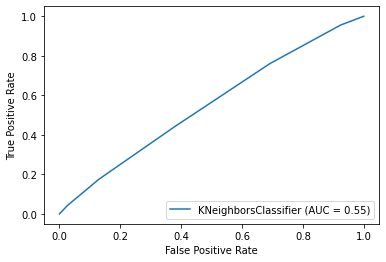

In [159]:
metrics.plot_roc_curve(lr_model,x_test, y_test)
metrics.plot_roc_curve(knn_model,x_test, y_test)